<h1 style='color:#00008B; font-family:poppins;'>Analysis of House Sales in King County (May 2014 - May 2015)</h1>

<p style='font-family:poppins; color:#00000;'>King County is a county located in the U.S. state of Washington. The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. Due to the large population, the real estate market is increasing. This project is performed to analyse a dataset of house sales in King County between May 2014 and May 2015 and therefore predict the price of houses in a specific location.</p>

<p style='font-family:poppins; color:#00000;'><b>The following libraries will be needed for the analysis</b></p>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

<h3 style='color:#00008B; font-family:poppins;'>Importing the Datasets</h3>

In [2]:
# loading the csv file
file_name = r'C:\Users\Sade\Desktop\DATA SCIENCE\Data Analysis with Python\kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

# display first five rows of the dataframe
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<p style='color:#00000; font-family:poppins;'>This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.</p>

<p style='color:#00000; font-family:poppins;'> The following explains what each of the columns denote:</p>

<div style='color:#00000; font-family:poppins;'>
<b>id</b> : A notation for a house
<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)
</div>

<h3 style='color:#00008B; font-family:poppins;'>Statistical Summary of the Dataset</h3>

In [6]:
# datatypes of each column in the dataframe
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# statistical summary
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<p style='color:#00000; font-family:poppins;'>From the column above, the data does not seem very accurate and presentable. Therefore, we have to clean the data</p>

<h3 style='color:#00008B; font-family:poppins;'> Data Wrangling</h3>

<p style='color:#00000; font-family:poppins;'>I will now drop the first two columns (Unnamed:0 and id) because they are irrelevant to the datframe and are affecting the statistical summary</p>

In [ ]:
# NB: I have run the cell before, just putting it here to show the code
# dropping the first two columns
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<p style='color:#00000; font-family:poppins;'>We have a new statistical summary but our dataset is not totally clean. There are mising values in the bedroom and bathroom columns</p>

In [11]:
# showing the number of missing values
print('There are', df['bedrooms'].isnull().sum(),'missing values in the bedroom column')
print('There are', df['bathrooms'].isnull().sum(),'missing values in the bathrooms column')

There are 13 missing values in the bedroom column
There are 10 missing values in the bathrooms column


<p style='color:#00000; font-family:poppins;'>Now i have to replace the missing values in the columns with their mean values</p>

In [12]:
# mean values for bedrooms and bathrooms column
bedrooms_mean = df['bedrooms'].mean()
bathrooms_mean = df['bathrooms'].mean()
# replace NaN with mean values for bedrooms and bathrooms columns
df['bedrooms'].replace(np.nan, bedrooms_mean, inplace=True)
df['bathrooms'].replace(np.nan, bathrooms_mean, inplace=True)

<p style='color:#00000; font-family:poppins;'>I will confirm if there are still any missing values left</p>

In [14]:
# showing the number of missing values
print('There are', df['bedrooms'].isnull().sum(),'missing values in the bedroom column')
print('There are', df['bathrooms'].isnull().sum(),'missing values in the bathrooms column')

There are 0 missing values in the bedroom column
There are 0 missing values in the bathrooms column


<p style='color:#00000; font-family:poppins;'>Next, i will perform an Exploratory Data Analysis</p>

<h3 style='color:#00008B; font-family:poppins;'> Exploratory Data Analysis</h3>

In [16]:
# viewing my clean dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<p style='color:#00000; font-family:poppins;'>Firstly, i will determine the number of houses with unique floor values</p>

In [17]:
# value count of the floors of different houses
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<p style='color:#00000; font-family:poppins;'>Now, i will use a boxplot to determine whether houses with waterfront view or without waterfront view have more price outliers</p>

In [19]:
# value count of waterfront view of different houses
df['waterfront'].value_counts().to_frame()

,waterfront
0,21450
1,163


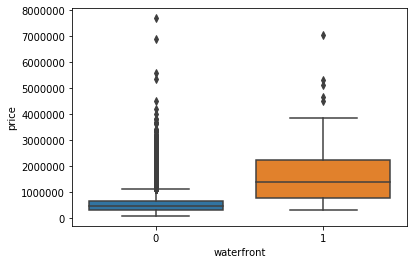

In [21]:
# checking prices outliers
sns.boxplot(x='waterfront', y='price', data=df)

<p style='color:#00000; font-family:poppins;'>According to the boxplot, houses with no waterfront view have more price outliers</p>

<p style='color:#00000; font-family:poppins;'>I will also use a regression plot to determine whether the sqft_above is negatively or positively correlated with the price</p>

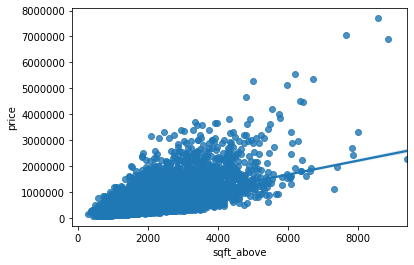

In [22]:
# correlation of sqft_above with price
sns.regplot(x='sqft_above', y='price', data=df)

<p style='color:#00000; font-family:poppins;'>According the the regression plot, the sqft_above positively correlates with the price</p>

In [23]:
#correlation table
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [25]:
# correlation of other features with price in ascending order
df.corr()['price'].sort_values().to_frame()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


<p style='color:#00000; font-family:poppins;'>The dataframe above indicates sqft_living correlates most with the price</p>

<h3 style='color:#00008B; font-family:poppins;'>Model Development</h3>

<p style='color:#00000; font-family:poppins;'>In developing a model, i will fit a linear regression model for a features in relation with the price. <b>sqft_living</b> and <b>grade</b> are the two most correlated features with price, therefore they have the highest tendencies to determine the price of a house</p>

In [26]:
# fitting a linear regression for sqft_living against price
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
# calculating the R^2
lm.score(X,Y)

0.49285321790379316

In [28]:
# fitting a linear regression for grade against price
X1 = df[['grade']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1,Y1)
# calculating the R^2
print('The R-squared value is:', lm1.score(X1,Y1))

The R-squared value is: 0.4454684861092873


<p style='color:#00000; font-family:poppins;'>Now i will determine the R-squared value using a list of features</p>

In [31]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
# fit the linear regression model
F = df[features]
P = df['price']
lr = LinearRegression()
lr.fit(F,P)
# calculate teh R^2
print('The R-squared value is:', lr.score(F,P))

The R-squared value is: 0.657679183672129


<p style='color:#00000; font-family:poppins;'>Now, i will create a pipeline to automate the prediction of the house prices</p>

<div style='color:#00000; font-family:poppins;'>
<p>Firstly, i will create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code></p></div>


In [32]:
Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

In [33]:
#create the pipeline object
pipe = Pipeline(Input)
#fit the object using the features
pipe.fit(F,P)
# predict the house prices
ypipe = pipe.predict(F)
ypipe[0:10]

array([ 349650.25,  559166.75,  449507.25,  393247.25,  521712.25,
       2035387.25,  210446.  ,  291394.25,  442523.25,  290744.5 ])

<h3 style='color:#00008B; font-family:poppins;'>Model Evaluation and Refinement</h3>

<p style='color:#00000; font-family:poppins;'>The following modules will be needed for evaluation and refinement</p>

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

<p style='color:#00000; font-family:poppins;'>I will spilt the data into training and testing sets</p>

In [36]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
F = df[features]
p = df['price']

x_train, x_test, y_train, y_test = train_test_split(F, P, test_size=0.15, random_state=1)

print('no of train samples:', x_train.shape[0])
print('no of test samples:', x_test.shape[0])

no of train samples: 18371
no of test samples: 3242


<p style='color:#00000; font-family:poppins;'>Now i will create a Ridge Regression object using the training datasets and calculate the R^2 using the test data</p>

In [39]:
from sklearn.linear_model import Ridge

In [40]:
#create Ridge object
RidgeModel = Ridge(alpha=0.1)
#fit the Ridge
RidgeModel.fit(x_train, y_train)
# calculate the R^2 using the test dataset
RidgeModel.score(x_test,y_test)

0.6478759163939121

<p style='color:#00000; font-family:poppins;'>Finally, i will perform a second degree polynomial transform on the training and test datasets. Thereafter, i will create and fit a Ridge Regression object and calculate R^2 using the test datasets</p>

In [41]:
#create polynomial object
pr = PolynomialFeatures(degree=2)
# perform second degree polynomial transform on training and test datasets
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

# create the Ridge object
RidgeModel1 = Ridge(alpha=0.1)
# fit the Ridge regression model
RidgeModel1.fit(x_train_pr, y_train)
RidgeModel1.score(x_test_pr, y_test)

0.7002744279896707

<p style='color:#00000; font-family:poppins;'>In conclusion, the model fits better as a polynomial feature rather than as a linear model</p>